In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Loan= pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
Loan.shape

(614, 13)

<AxesSubplot:>

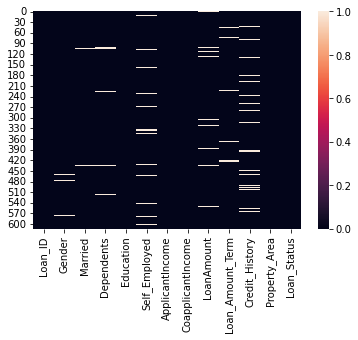

In [4]:
sns.heatmap(Loan.isnull())

We can see null values in few columns.

In [5]:
Loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


columns with object dtype will require to be encoded later on

In [7]:
Loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [4]:
Loan.drop('Loan_ID',axis=1,inplace= True)

Load_Id is a unique identifier which is not required for our analysis

In [5]:
Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Handling Missing Values

In [9]:
Loan.Gender.mode()

0    Male
Name: Gender, dtype: object

In [10]:
Loan.Married.mode()

0    Yes
Name: Married, dtype: object

In [11]:
Loan.Dependents.mode()

0    0
Name: Dependents, dtype: object

In [12]:
Loan.Self_Employed.mode()

0    No
Name: Self_Employed, dtype: object

In [13]:
Loan.Loan_Amount_Term.mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [14]:
Loan.Credit_History.mode()

0    1.0
Name: Credit_History, dtype: float64

In [13]:
Loan.LoanAmount.median()

129.0

In [11]:
#Filling the missing values in Gender by Mode
Loan['Gender']=Loan['Gender'].fillna(Loan['Gender'].mode()[0])

#Filling the missing values in Married  by mode
Loan['Married']=Loan['Married'].fillna(Loan['Married'].mode()[0])

#Filling the missing values in Dependents by Mode
Loan['Dependents']=Loan['Dependents'].fillna(Loan['Dependents'].mode()[0])

#Filling the missing values in Self_Employed by Mode
Loan['Self_Employed']=Loan['Self_Employed'].fillna(Loan['Self_Employed'].mode()[0])



#Filling the missing values in Credit_History by Mode
Loan['Credit_History']=Loan['Credit_History'].fillna(Loan['Credit_History'].mode()[0])

#Filling the missing values in LoanAmount by median
Loan['LoanAmount']=Loan['LoanAmount'].fillna(Loan['LoanAmount'].median())



In [8]:
#Filling the missing values in Loan_Amount_Term by Mode
Loan['Loan_Amount_Term']=Loan['Loan_Amount_Term'].fillna(Loan['Loan_Amount_Term'].mode()[0])

In [12]:
Loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Visualization

### Number of students who received loan

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

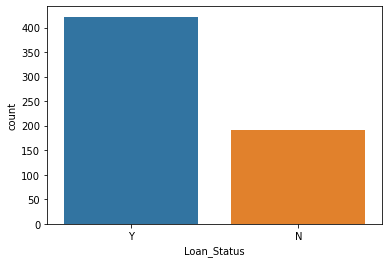

In [20]:
sns.countplot(Loan['Loan_Status'])

Y indicates the students who have received loan and N indicates those who haven't. We have to analyse further to see which features are correlated those receiving loan and those who aren't

### Distribution of Data

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

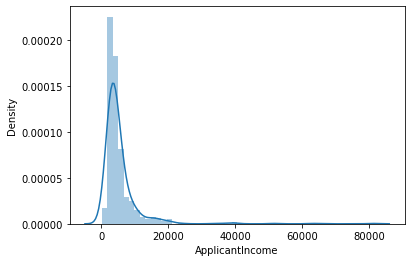

In [11]:
sns.distplot(Loan['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

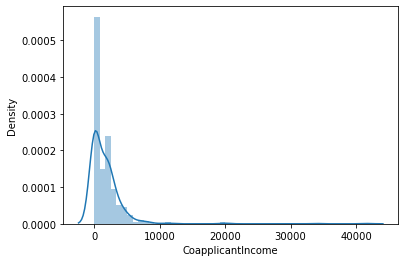

In [13]:
sns.distplot(Loan['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

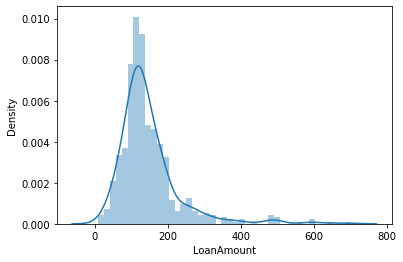

In [18]:
sns.distplot(Loan['LoanAmount'])

- We see that all the data that contained continous values are skewed are will required to be normalised 
- As observed in the figure, all the graphs are right skewed

Male      489
Female    112
Name: Gender, dtype: int64


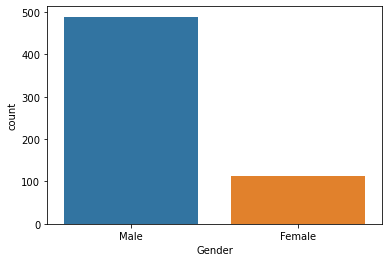

In [30]:
sns.countplot(Loan['Gender'])
print(Loan['Gender'].value_counts())

- There are more male applicants than female

Yes    398
No     213
Name: Married, dtype: int64


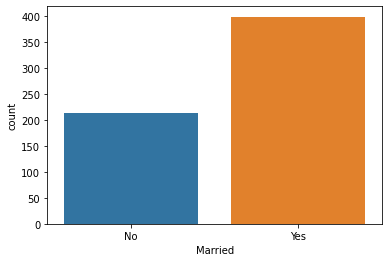

In [31]:
sns.countplot(Loan['Married'])
print(Loan['Married'].value_counts())

- Majority of the applicants are married

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


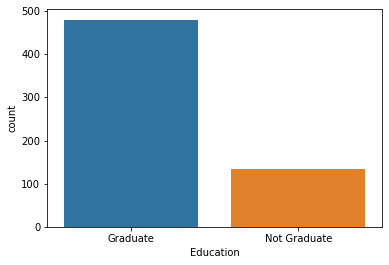

In [24]:
sns.countplot(Loan['Education'])
print(Loan['Education'].value_counts())

- Most of the applicants are graduated

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


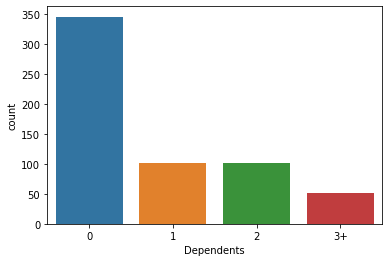

In [32]:
sns.countplot(Loan['Dependents'])
print(Loan['Dependents'].value_counts())

- Most of the applicants have 0 dependents.
- +3 indicates more than three dependents

No     500
Yes     82
Name: Self_Employed, dtype: int64


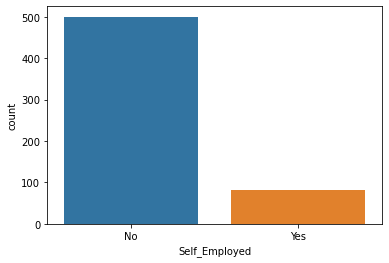

In [25]:
sns.countplot(Loan['Self_Employed'])
print(Loan['Self_Employed'].value_counts())

- Majority of the applicants are self employed

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


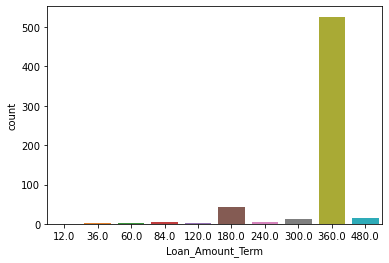

In [54]:
sns.countplot(Loan['Loan_Amount_Term'])
print(Loan['Loan_Amount_Term'].value_counts())

- It looks like most of the applicants prefer to have a loan amount term to be 360

1.0    475
0.0     89
Name: Credit_History, dtype: int64


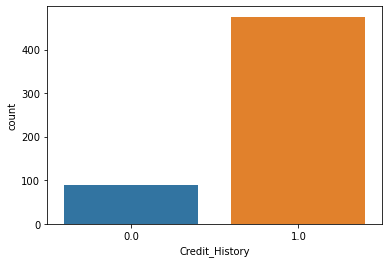

In [28]:
sns.countplot(Loan['Credit_History'])
print(Loan['Credit_History'].value_counts())

- Majority of the applicats have a good credit history

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


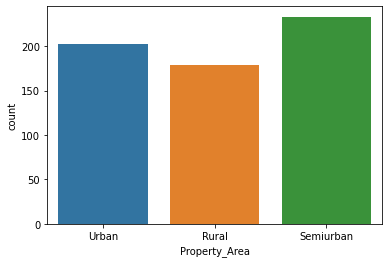

In [29]:
sns.countplot(Loan['Property_Area'])
print(Loan['Property_Area'].value_counts())

- Most of the applicants are from semi urban region

347


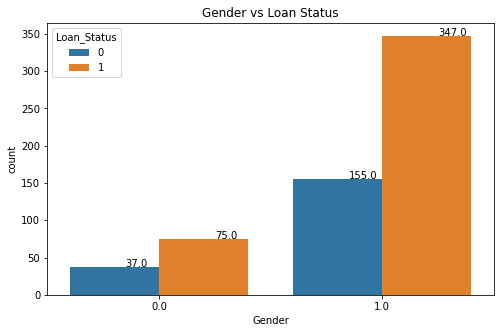

In [127]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=Loan, x="Gender", hue='Loan_Status')
plt.title('Gender vs Loan Status')
                 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


- There is not much difference in people who have received loan based on gender if we analyse the ratio between the two

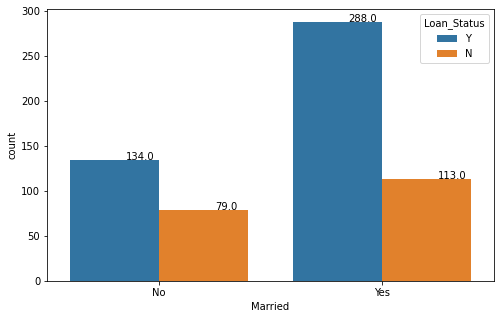

In [54]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=Loan, x="Married", hue='Loan_Status')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

- Those who are married have higher chances of getting a loan

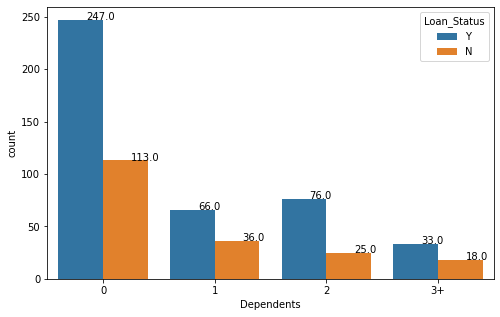

In [53]:
plt.figure(figsize=(8,5))
ax= sns.countplot(data=Loan, x="Dependents", hue='Loan_Status')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

- No evident correlation in terms of increasing number of dependents can be established

In [38]:
Loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

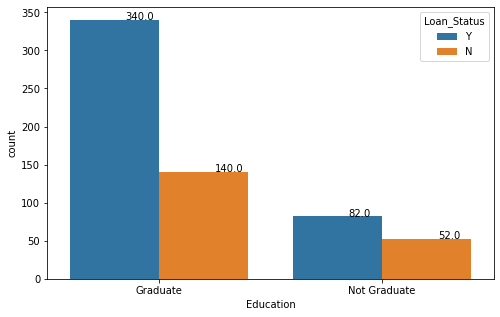

In [52]:
plt.figure(figsize=(8,5))
ax= sns.countplot(data=Loan, x="Education", hue='Loan_Status')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

- People who are Graduated are more likely to get a loan

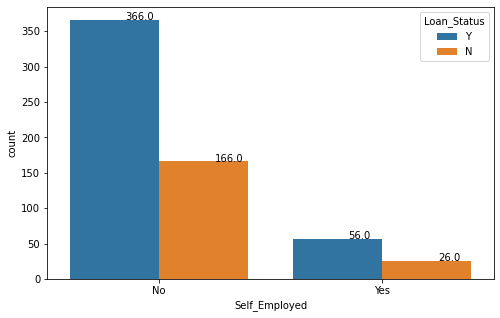

In [51]:
plt.figure(figsize=(8,5))
ax= sns.countplot(data=Loan, x="Self_Employed", hue='Loan_Status')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

- People who are not self employed have applied for the loan ,however there seems to be no correlation with loan status

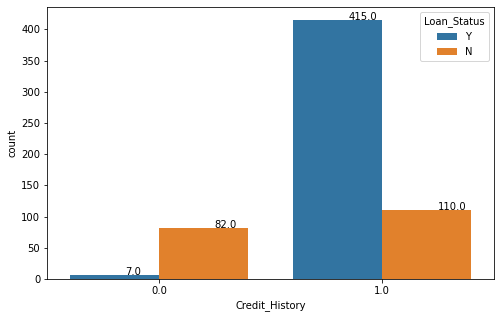

In [50]:
plt.figure(figsize=(8,5))
ax= sns.countplot(data=Loan, x="Credit_History", hue='Loan_Status')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

- people who do not have a good credit history clearly has a very low chance of getting a loan

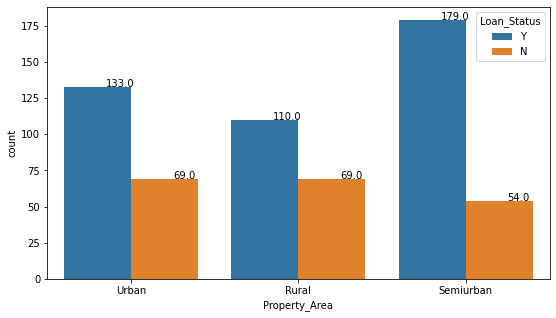

In [49]:
plt.figure(figsize=(9,5))
ax= sns.countplot(data=Loan, x="Property_Area", hue='Loan_Status')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

- People living in semi-urban region has better chance of getting a loan followed by urban people and then the people living in rural area. 

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

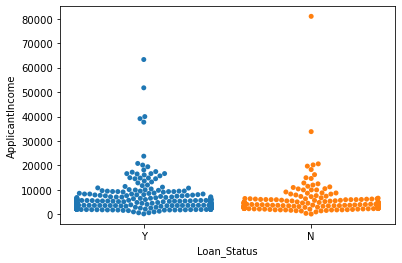

In [66]:
sns.swarmplot(data=Loan,x='Loan_Status',y='ApplicantIncome')

- The applicants were mostly people with low applicant income based on the distribution we saw earlier. It does seem likeit is less likely to get a loan if the applicant income is high

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

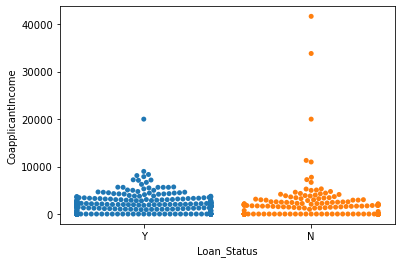

In [67]:
sns.swarmplot(data=Loan,x='Loan_Status',y='CoapplicantIncome')

- Again there seems to be less probability of getting a loan if the coapplicant income is high

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

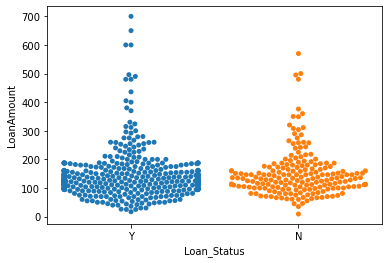

In [68]:
sns.swarmplot(data=Loan,x='Loan_Status',y='LoanAmount')

## Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
Loan['Loan_Status']=le.fit_transform(Loan['Loan_Status'])

In [15]:
Loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for i in Loan.columns:
    if Loan[i].dtypes== 'object':
        Loan[i]= oe.fit_transform(Loan[i].values.reshape(-1,1))

In [19]:
Loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


In [21]:
Loan['Dependents']=(Loan['Dependents'].replace(+3,3))

In [22]:
Loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1


## Correlation

In [26]:
corr = Loan.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

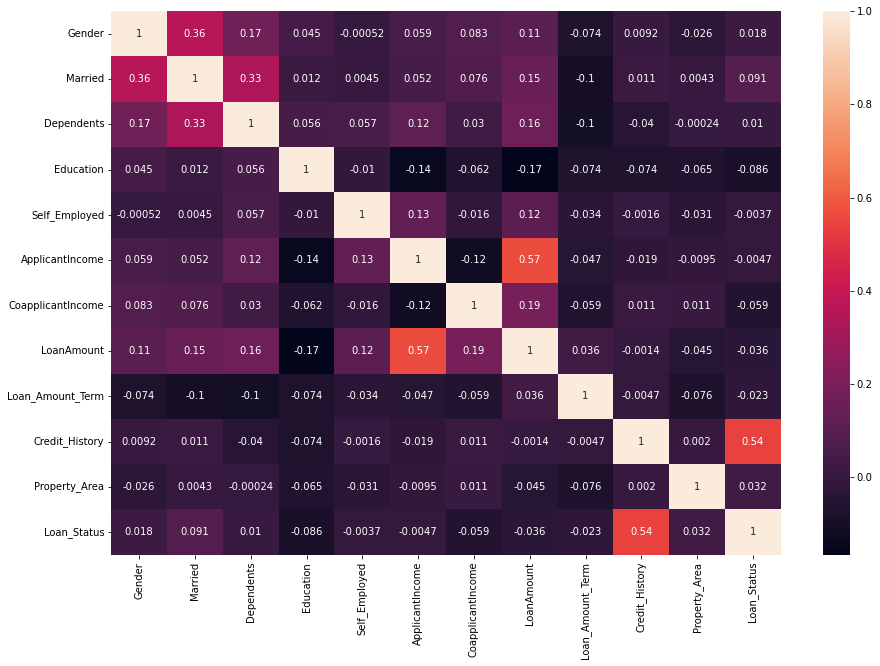

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

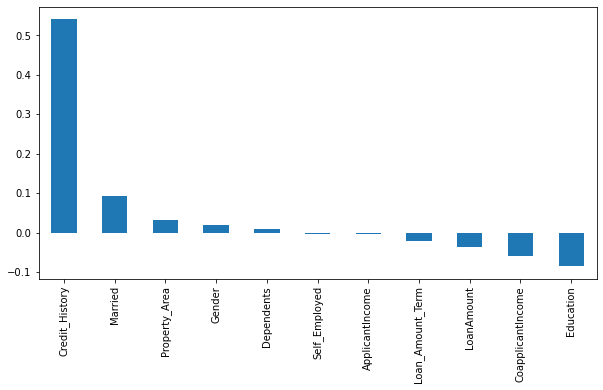

In [33]:
Loan.drop('Loan_Status',axis= 1).corrwith(Loan.Loan_Status).sort_values(ascending= False).plot(kind='bar', figsize = (10,5))


- Here we can visualize the correlation between the features and target
- Credit History is showing a very high positive correlation with Loan Status
- Self Employment and Applicant income have very less correlation with the targent

## Checking for outliers

In [35]:
f = Loan[['LoanAmount','ApplicantIncome','CoapplicantIncome']]

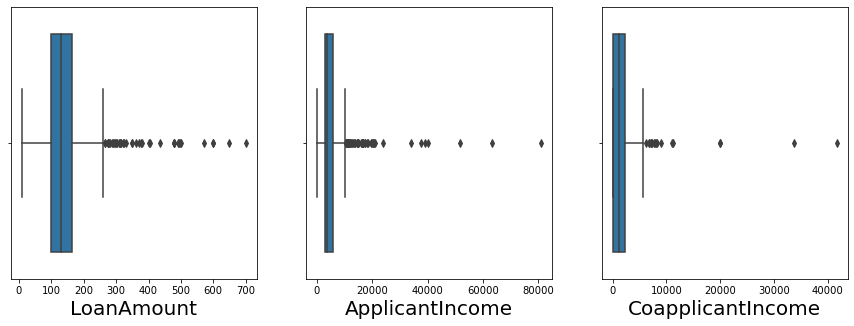

In [41]:
plt.figure(figsize =(15,5), facecolor='white')
plotnumber = 1

for column in f :
    if plotnumber <= 3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(f[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber +=1
plt.show()

- we do observe a lot of outliers but these seem to be natural outliers since we have data from people of different backgrounds 

#### Removal of outliers

In [44]:
f=Loan[['LoanAmount','ApplicantIncome', 'CoapplicantIncome']]


In [45]:
import scipy
from scipy.stats import zscore
np.abs(zscore(f)<3).all().all()

False

In [47]:
z=np.abs(zscore(f))

In [48]:
df=Loan[(z<3).all(axis=1)]
df.shape

(589, 12)

#### Splitting data

In [50]:
X= df.drop('Loan_Status',axis=1)

In [51]:
y= df['Loan_Status']

#### Checking for skewness


In [52]:
X.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.063183
dtype: float64

- We do not have to treat skewness for categorical columns.
- However, there seems to be skewness in the numerical columns : ApplicantIncome,CoapplicantIncome and LoanAmount which requires treatment

In [53]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

i = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
X[i]= scaler.fit_transform(X[i].values)
X.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060143
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.063183
dtype: float64

- our columns that were continous is now close to normal distribution

#### SMOTE 

In [59]:
##Balancing the dataset
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

X,y = SMOTE().fit_resample(X, y)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

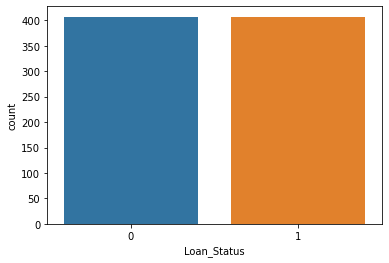

In [60]:
sns.countplot(y,data=df)

- Now the dataset is balanced

## Models

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [68]:
#Finding the random state

MaxAcc = 0
MaxRS =0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.10,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf= rf.predict(X_test)
    acc= accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
        print('accuracy',MaxAcc,'random_state',i)

accuracy 0.8536585365853658 random_state 1
accuracy 0.8536585365853658 random_state 1
accuracy 0.8658536585365854 random_state 1
accuracy 0.8658536585365854 random_state 2
accuracy 0.8414634146341463 random_state 1
accuracy 0.8536585365853658 random_state 1
accuracy 0.8170731707317073 random_state 1
accuracy 0.7926829268292683 random_state 1
accuracy 0.9024390243902439 random_state 1
accuracy 0.9024390243902439 random_state 7
accuracy 0.8048780487804879 random_state 1
accuracy 0.9390243902439024 random_state 1
accuracy 0.9390243902439024 random_state 9
accuracy 0.8536585365853658 random_state 1
accuracy 0.8780487804878049 random_state 1
accuracy 0.9146341463414634 random_state 1
accuracy 0.8658536585365854 random_state 1
accuracy 0.8536585365853658 random_state 1
accuracy 0.8048780487804879 random_state 1
accuracy 0.8292682926829268 random_state 1
accuracy 0.9390243902439024 random_state 1
accuracy 0.8170731707317073 random_state 1
accuracy 0.9024390243902439 random_state 1
accuracy 0.

In [70]:
print('Maximum accuracy',MaxAcc,'Random state: ',MaxRS)

Maximum accuracy 0.9512195121951219 Random state:  62


In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.10,random_state=62)


# Logistic Regression

In [72]:
LR.fit(X_train,y_train)
predlr = LR.predict(X_test)
print('Accuracy',accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 74.39024390243902
[[25 13]
 [ 8 36]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.73      0.82      0.77        44

    accuracy                           0.74        82
   macro avg       0.75      0.74      0.74        82
weighted avg       0.75      0.74      0.74        82



# RandomForest Classifier

In [74]:
rf.fit(X_train,y_train)
predrf = rf.predict(X_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 97.5609756097561
[[37  1]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.98      0.98      0.98        44

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82



# DescisionTree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt= dt.predict(X_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 86.58536585365853
[[37  1]
 [10 34]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        38
           1       0.97      0.77      0.86        44

    accuracy                           0.87        82
   macro avg       0.88      0.87      0.87        82
weighted avg       0.89      0.87      0.87        82



# KNeighborsClassifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predkn= knn.predict(X_test)
print('Accuracy',accuracy_score(y_test,predkn)*100)
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy 80.48780487804879
[[34  4]
 [12 32]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        38
           1       0.89      0.73      0.80        44

    accuracy                           0.80        82
   macro avg       0.81      0.81      0.80        82
weighted avg       0.82      0.80      0.80        82



# AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
predada= ada.predict(X_test)
print('Accuracy',accuracy_score(y_test,predada)*100)
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy 89.02439024390245
[[33  5]
 [ 4 40]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.89      0.91      0.90        44

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



# GradientBoosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
predgr= gr.predict(X_test)
print('Accuracy',accuracy_score(y_test,predgr)*100)
print(confusion_matrix(y_test,predgr))
print(classification_report(y_test,predgr))

Accuracy 90.2439024390244
[[33  5]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.89      0.93      0.91        44

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



- Based on the accuracy calculated, RandomForestClassifier gave us the best accuracy 97.56

## Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score

In [106]:
a = cross_val_score(LR,X,y,cv=9)
print('Cross validation score of Logistic Regression',a.mean())

Cross validation score of Logistic Regression 0.7015466015466015


In [107]:
b = cross_val_score(rf,X,y,cv=9)
print('Cross validation score of RandomForest Classifier',b.mean())

Cross validation score of RandomForest Classifier 0.8665309998643332


In [108]:
c = cross_val_score(dt,X,y,cv=9)
print('Cross validation score of DecisionTree Classifier',c.mean())

Cross validation score of DecisionTree Classifier 0.7816985483652151


In [109]:
d= cross_val_score(ada,X,y,cv=9)
print('Cross validation score of AdaBoost Classifier',d.mean())

Cross validation score of AdaBoost Classifier 0.7791480124813457


In [110]:
e= cross_val_score(knn,X,y,cv=9)
print('Cross validation score of KNeighbour Classifier',e.mean())

Cross validation score of KNeighbour Classifier 0.7715778049111381


In [111]:
f=cross_val_score(gr,X,y,cv=9)
print('Cross validation score of GradientBoosting Classifier',f.mean())

Cross validation score of GradientBoosting Classifier 0.8136752136752138


- kNeighbour Clasifier has least difference between accuracy score and cross validation score. So we shall select that as our best model

## Hyperparameter Tuning

In [112]:
n_neighbors= [1,2,3,4,5,6]
p= [1,2,3,4,5,6,7]
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size=[10,20,30,40,50,60]
weights = ['uniform','distance']


In [114]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': n_neighbors,'p': p,'algorithm':algorithm,'leaf_size':leaf_size,'weights':weights}

In [115]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=9,scoring='accuracy')
GCV.fit(X_train,y_train)
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

In [116]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [117]:
GCV.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=4, p=1, weights='distance')

In [120]:
GCV_pred = GCV.best_estimator_.predict(X_test)
acc=accuracy_score(y_test,GCV_pred)
print(acc*100)

82.92682926829268


On Hyperparameter Tuning the model has improved from 77.15% to 82.92%

## ROC CURVE

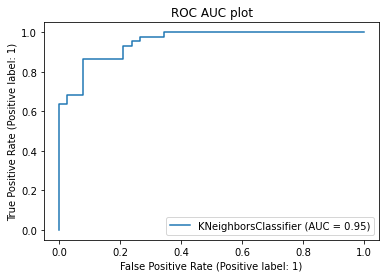

In [123]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,y_test)
plt.title('ROC AUC plot')
plt.show()

Our final accuracy score is 82.92% with AUC score as 95%

## Saving the model

In [125]:
import joblib
joblib.dump(GCV.best_estimator_,'Loan Application Status.pkl')

['Loan Application Status.pkl']